# 4.2 Implementação do modelo baseado em Rede Neural

## Bibliotecas

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import optimizers
import pickle
from sklearn import model_selection
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

## Dataset

In [2]:
df = pd.read_csv('data/proposicoes_ord_2013-2023.csv')

In [3]:
df['idProposicao'] = df['idProposicao'].astype('str')
colunas = [col for col in df.columns if col != 'VirouLei'] + ['VirouLei']
df = df.reindex(columns=colunas)

In [4]:
X = df.select_dtypes(include=['int64', 'float64'])
y = X['VirouLei']
X = X.drop(columns=['Ano','VirouLei'])

In [5]:
X

,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,Influencia,Aliado,Oposição,PPC_igual_partidoAutor
0,0,1,0,0,0,0.077973,1,0,0
1,1,1,0,0,1,0.024691,1,0,0
2,0,1,0,0,0,0.025341,1,0,0
3,0,0,0,1,0,0.148148,1,0,0
4,0,0,0,1,0,0.033138,1,0,0
...,...,...,...,...,...,...,...,...,...
7936,1,1,0,1,0,0.080078,0,1,0
7937,0,1,0,0,0,0.029297,1,0,0
7938,0,0,1,0,0,0.132812,1,0,0
7939,1,0,0,0,0,0.007812,1,0,0


### Undersampling

Os nossos dados estão desbalanceados.
Por esse motivo fizemos undersampling para igualar a quantidade de exemplos da classe minoritária (1) e da classe majoritária (0)

In [6]:
undersample = RandomUnderSampler()
X_resampled, y_resampled = undersample.fit_resample(X, y)
X_resampled

,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,Influencia,Aliado,Oposição,PPC_igual_partidoAutor
7159,1,0,0,1,0,0.107212,0,1,0
5122,1,0,1,0,0,0.080235,0,1,1
7771,1,0,1,1,0,0.115234,1,0,0
5433,0,0,1,0,0,0.066277,0,1,0
468,0,1,0,0,0,0.048733,1,0,1
...,...,...,...,...,...,...,...,...,...
7934,1,1,0,1,0,0.132812,1,0,1
7935,0,1,1,0,0,0.115234,1,0,0
7936,1,1,0,1,0,0.080078,0,1,0
7937,0,1,0,0,0,0.029297,1,0,0


In [7]:
from imblearn.under_sampling import NearMiss
from collections import Counter

nm = NearMiss(version=1)

# Aplicando o undersampling
X_resampled, y_resampled = nm.fit_resample(X, y)

# Contagem de classes após undersampling
print("Classes após undersampling:", Counter(y_resampled))

Classes após undersampling: Counter({0: 757, 1: 757})


## Chamando o modelo

In [8]:
RANDOM_STATE=2
BATCH_SIZE=10

Neurônios por camada

 $n \le \lfloor \frac{\lvert DS \rvert - 10}{10\times (d+2)} \rfloor$ 

In [9]:
n = np.floor((1514 - 10) / (10*(9+2)))
print("Número maximo de neurônios na camada oculta: ", n)


Número maximo de neurônios na camada oculta:  13.0


Separando em treino, teste e validação

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_resampled, y_resampled, random_state=RANDOM_STATE, test_size=0.2)
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, random_state=RANDOM_STATE, test_size=0.2)


In [11]:
model = Sequential()
model.add(Dense(10, input_dim = 9, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

/home/adriel/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
sgd = optimizers.SGD(learning_rate=0.01)  

In [13]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=BATCH_SIZE)

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5055 - loss: 0.6931 - val_accuracy: 0.6790 - val_loss: 0.6915
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6674 - loss: 0.6891 - val_accuracy: 0.7243 - val_loss: 0.6747
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6536 - loss: 0.6694 - val_accuracy: 0.7243 - val_loss: 0.6373
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - loss: 0.6431 - val_accuracy: 0.7243 - val_loss: 0.6099
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6665 - loss: 0.6245 - val_accuracy: 0.7243 - val_loss: 0.5943
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6839 - loss: 0.6008 - val_accuracy: 0.7119 - val_loss: 0.5856
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7157 - loss: 0.5840 - val_accuracy: 0.7037 - val_loss: 0.5788
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7146 - loss: 0.5850 - val_accuracy: 0.7037 - val_loss:

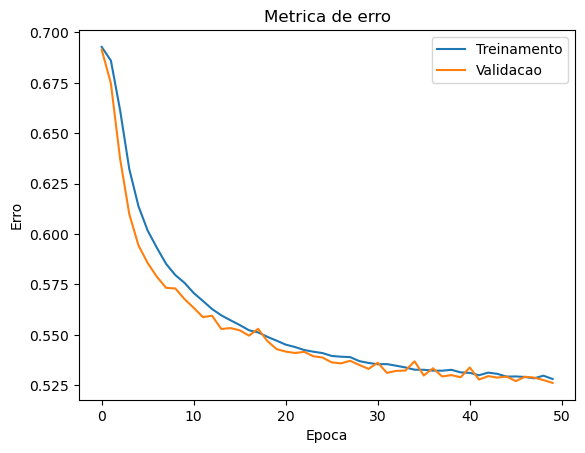

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

--> Acuracia (treino): 0.7159
--> Acuracia (validacao): 0.7202
--> acc_train - acc_val = -0.0043
--> E_val - E_in = -0.0019


In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

Matriz de Confusão

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


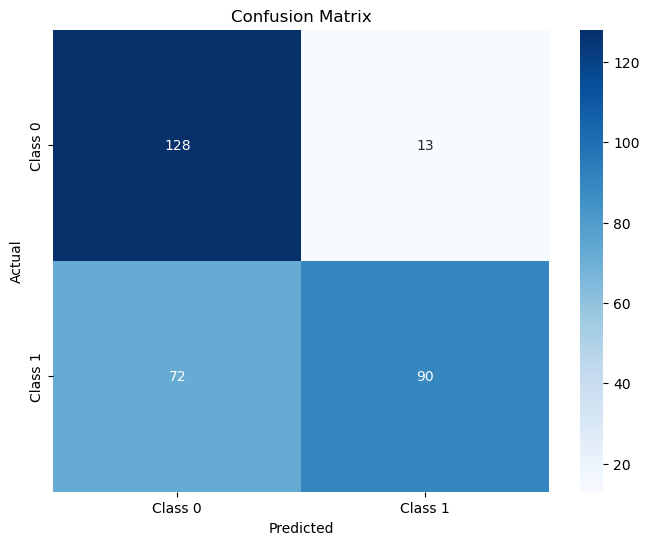

In [16]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [45]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Precisão:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Precisão: 0.7649947130635394
Recall: 0.7194719471947195
F1 Score: 0.7125119085249974

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.64      0.91      0.75       141
           1       0.87      0.56      0.68       162

    accuracy                           0.72       303
   macro avg       0.76      0.73      0.71       303
weighted avg       0.76      0.72      0.71       303



O modelo está generalizando bem, porém apresenta uma acurácia baixa, o que indica que ele não está capturando completamente o padrão dos dados. Talvez por ter poucos dados, complexidade inadequada do modelo ou as características dos dados que precisam ser ajustadas.

Regularização

In [18]:
from keras import regularizers
from keras.callbacks import EarlyStopping

model = Sequential()

# Após o teste anterior, testem a rede neural abaixo, treinando-a com o Early Stopping
model.add(Dense(10, input_dim=9, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
"""model.add(Dropout(0.2))
model.add(Dense(200, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
"""
# Early Stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

print(model.summary())

# Treinamento SEM Early Stopping
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=BATCH_SIZE)


/home/adriel/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111 (444.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5859 - loss: 0.6937 - val_accuracy: 0.7037 - val_loss: 0.6869
Epoch 2/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6815 - loss: 0.6834 - val_accuracy: 0.6708 - val_loss: 0.6712
Epoch 3/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6502 - loss: 0.6694 - val_accuracy: 0.6708 - val_loss: 0.6519
Epoch 4/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6687 - loss: 0.6486 - val_accuracy: 0.6708 - val_loss: 0.6354
Epoch 5/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6547 - loss: 0.6372 - val_accuracy: 0.6626 - val_loss: 0.6271
Epoch 6/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6733 - loss: 0.6256 - val_accuracy: 0.6708 - val_loss: 0.6144
Epoch 7/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7004 - loss: 0.6050 - val_accuracy: 0.6626 - val_loss: 0.6080
Epoch 8/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7028 - loss: 0.5962 - val_accuracy: 0.662

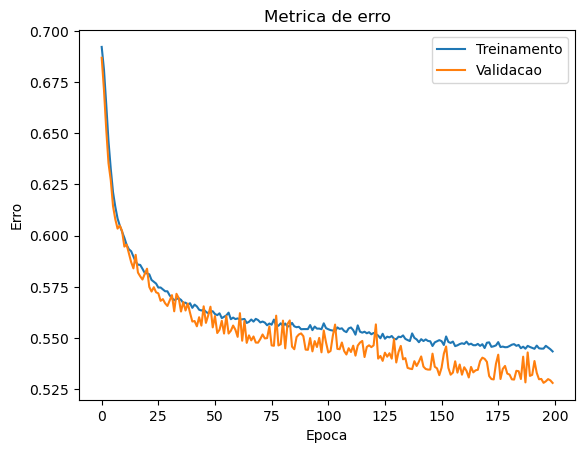

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

--> Acuracia (treino): 0.7190
--> Acuracia (validacao): 0.7160
--> acc_train - acc_val = 0.0030
--> E_val - E_in = -0.0154


In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

Utilizando K-Fold Cross Validation

/home/adriel/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


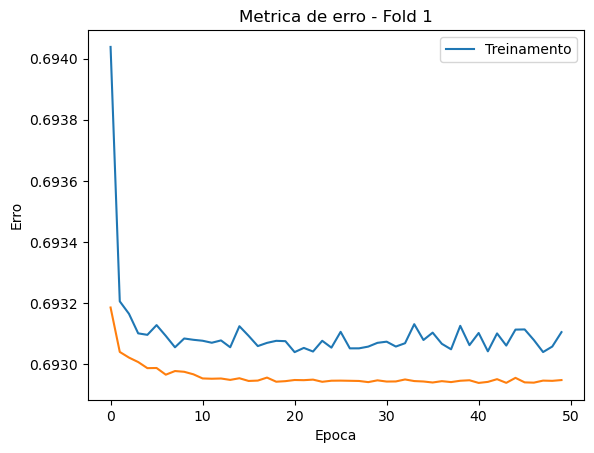

--> Acuracia (treino): 0.5083
--> Acuracia (validacao): 0.5103
--> E_val - E_in = -0.0002
--> acc_in - acc_val = -0.0020



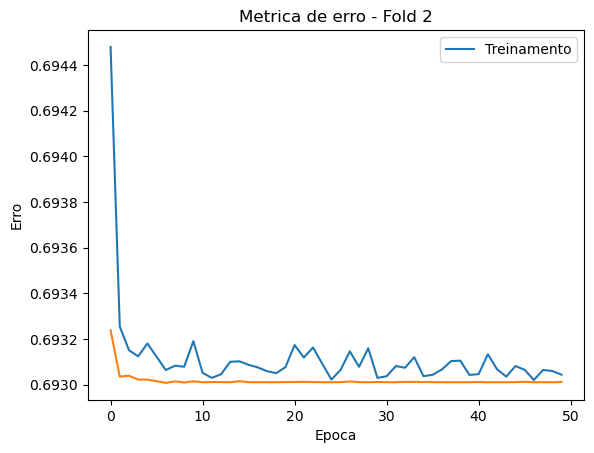

--> Acuracia (treino): 0.5088
--> Acuracia (validacao): 0.5083
--> E_val - E_in = -0.0000
--> acc_in - acc_val = 0.0005



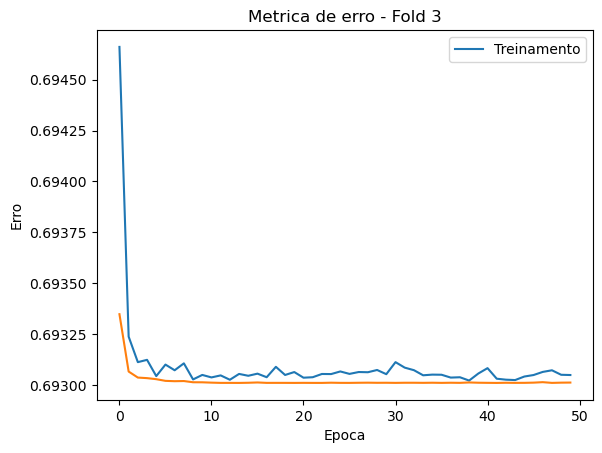

--> Acuracia (treino): 0.5088
--> Acuracia (validacao): 0.5083
--> E_val - E_in = -0.0000
--> acc_in - acc_val = 0.0005



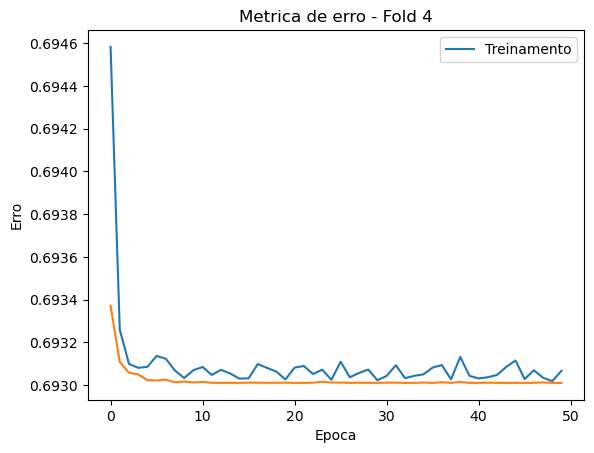

--> Acuracia (treino): 0.5088
--> Acuracia (validacao): 0.5083
--> E_val - E_in = -0.0001
--> acc_in - acc_val = 0.0005



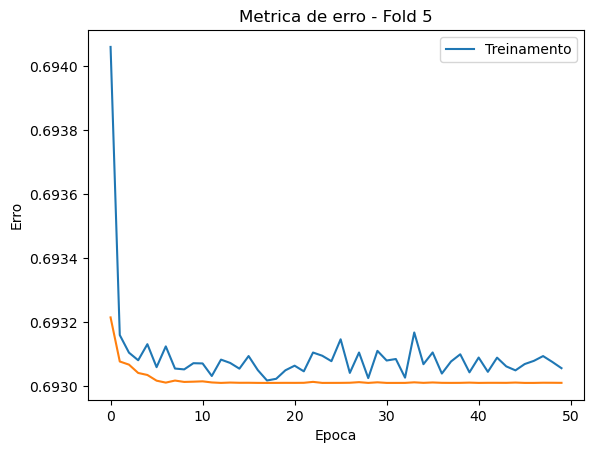

--> Acuracia (treino): 0.5088
--> Acuracia (validacao): 0.5083
--> E_val - E_in = -0.0000
--> acc_in - acc_val = 0.0005



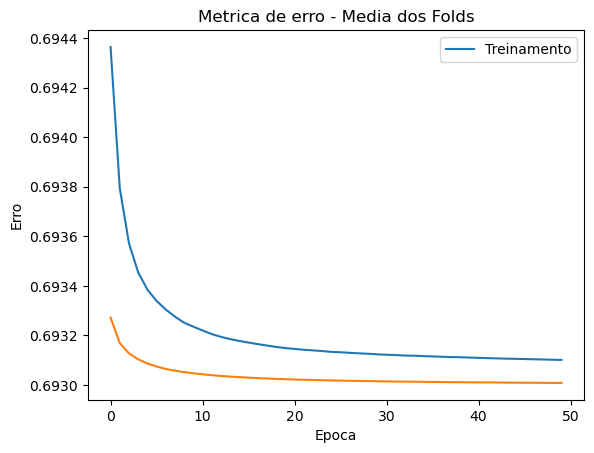

--> Acuracia (treino): 0.5087
--> Acuracia (validacao): 0.5087
--> E_val - E_in = -0.0001
--> acc_in - acc_val = 0.0005



In [20]:
from sklearn.model_selection import StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=RANDOM_STATE)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

accuracies_train = []
accuracies_val = []
history_list = []

i = 0
for train_index, val_index in skf.split(X_train, y_train):
    i = i + 1
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model = Sequential()
    model.add(Dense(10, input_dim=9, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

    history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=50, batch_size=BATCH_SIZE, verbose=0)
    history_list.append(history)


    _, acc_train = model.evaluate(X_train_fold, y_train_fold, verbose=0)
    _, acc_val = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    accuracies_train.append(acc_train)
    accuracies_val.append(acc_val)

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Metrica de erro - Fold {i}')
    plt.ylabel('Erro')
    plt.xlabel('Epoca')
    plt.legend(['Treinamento'])
    plt.show()

    print(f'--> Acuracia (treino): {acc_train:.4f}')
    print(f'--> Acuracia (validacao): {acc_val:.4f}')
    print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")
    print(f"--> acc_in - acc_val = {acc_train - acc_val:.4f}\n")    
avg_accuracy_train = np.mean(accuracies_train)
avg_accuracy_val = np.mean(accuracies_val)

# Historico com valores medios dos folds
history_loss_avg = []
history_val_loss_avg = []
aux_list1 = []
aux_list2 = []

for i in range(len(history.history['loss'])):
    for j in range(len(history_list)):
        aux_list1.append(history_list[j].history['loss'][i])
        aux_list2.append(history_list[j].history['val_loss'][i])
    history_loss_avg.append(np.mean(aux_list1))
    history_val_loss_avg.append(np.mean(aux_list2))                            
                   
plt.plot(history_loss_avg)
plt.plot(history_val_loss_avg)
plt.title('Metrica de erro - Media dos Folds')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

print(f'--> Acuracia (treino): {avg_accuracy_train:.4f}')
print(f'--> Acuracia (validacao): {avg_accuracy_val:.4f}')
print(f"--> E_val - E_in = {(history_val_loss_avg[-1] - history_loss_avg[-1]):.4f}")
print(f"--> acc_in - acc_val = {acc_train - acc_val:.4f}\n")    



In [21]:
_, accuracy_test = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=0)
print(f'Acuracia (teste): {accuracy_test:.4f}')

Acuracia (teste): 0.4653
